<a href="https://colab.research.google.com/github/Nivi23-ammu/Open-Repository/blob/Prompt%26OpenAI/M1_Assignment_Stock_Price_Prediction_with_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%pip install yfinance
import yfinance as yf
import pandas as pd

# Define the ticker symbol and date range
ticker_symbol = "AAPL"
start_date = "2015-01-01"
end_date = "2025-01-01"

# Download the historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the data
display(data.head())

/tmp/ipython-input-3851064214.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288584,24.757338,23.848709,24.746230,212818400
2015-01-05,23.604328,24.137509,23.417716,24.057531,257142000
2015-01-06,23.606558,23.866483,23.244438,23.668762,263188400
2015-01-07,23.937572,24.037543,23.704305,23.815385,160423600
2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000


In [13]:
# Calculate moving averages
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Calculate historical volatility (using a 14-day window)
data['Historical_Volatility'] = data['Close'].pct_change().rolling(window=14).std() * (252**0.5) # Annualized volatility

# Drop rows with NaN values created by rolling window calculations
data.dropna(inplace=True)

# Display the first few rows with new features
display(data.head())

Price,Close,High,Low,Open,Volume,MA_5,MA_10,MA_50,Historical_Volatility
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2015-03-16,27.868250,27.868250,27.404338,27.629602,143497200,27.644767,28.053145,26.642976,0.217700
2015-03-17,28.334398,28.396848,28.024379,28.080138,204092400,27.757624,28.001401,26.723892,0.209965
2015-03-18,28.653328,28.807223,28.184954,28.325466,261083600,28.035526,27.999840,26.824872,0.208290
2015-03-19,28.436987,28.827299,28.414684,28.715781,183238000,28.171577,28.024150,26.921481,0.200806
2015-03-20,28.080130,28.637716,27.915084,28.604262,274780400,28.274619,28.008537,27.004332,0.205367


# Task
Load historical stock price data for Apple Inc. (AAPL) from 2015-01-01 to 2025-01-01 using Yahoo Finance, generate meaningful features such as moving averages, technical indicators, and volatility measures, train a regression model for price prediction and a random forest model for trend classification, and evaluate their performance.

## Prepare data for regression

### Subtask:
Create the target variable for regression, which is the closing price.


**Reasoning**:
Create the target variable for regression by shifting the 'Close' price and then drop rows with NaN values resulting from the shift.



In [14]:
data['Target_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)
display(data.head())

Price,Close,High,Low,Open,Volume,MA_5,MA_10,MA_50,Historical_Volatility,Target_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2015-03-16,27.868250,27.868250,27.404338,27.629602,143497200,27.644767,28.053145,26.642976,0.217700,28.334398
2015-03-17,28.334398,28.396848,28.024379,28.080138,204092400,27.757624,28.001401,26.723892,0.209965,28.653328
2015-03-18,28.653328,28.807223,28.184954,28.325466,261083600,28.035526,27.999840,26.824872,0.208290,28.436987
2015-03-19,28.436987,28.827299,28.414684,28.715781,183238000,28.171577,28.024150,26.921481,0.200806,28.080130
2015-03-20,28.080130,28.637716,27.915084,28.604262,274780400,28.274619,28.008537,27.004332,0.205367,28.372307


## Prepare data for classification

### Subtask:
Create the target variable for classification, which indicates whether the price increased or decreased.


**Reasoning**:
Calculate the daily percentage change in the 'Close' price and create a binary classification target variable based on this change.



In [15]:
data['Price_Change_Pct'] = data['Close'].pct_change()
data['Price_Increase'] = (data['Price_Change_Pct'] > 0).astype(int)
data.dropna(inplace=True)
display(data.head())

Price,Close,High,Low,Open,Volume,MA_5,MA_10,MA_50,Historical_Volatility,Target_Close,Price_Change_Pct,Price_Increase
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,
Date,,,,,,,,,,,,
2015-03-17,28.334398,28.396848,28.024379,28.080138,204092400,27.757624,28.001401,26.723892,0.209965,28.653328,0.016727,1
2015-03-18,28.653328,28.807223,28.184954,28.325466,261083600,28.035526,27.999840,26.824872,0.208290,28.436987,0.011256,1
2015-03-19,28.436987,28.827299,28.414684,28.715781,183238000,28.171577,28.024150,26.921481,0.200806,28.080130,-0.007550,0
2015-03-20,28.080130,28.637716,27.915084,28.604262,274780400,28.274619,28.008537,27.004332,0.205367,28.372307,-0.012549,0
2015-03-23,28.372307,28.515049,28.218412,28.352234,150838800,28.375430,28.010098,27.074632,0.211292,28.256330,0.010405,1


## Split data

### Subtask:
Split the data into training and testing sets for both regression and classification tasks.


**Reasoning**:
Define features and targets for both regression and classification, then split the data into training and testing sets while maintaining the time series order.



In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) by dropping target variables and the original 'Close' column
X = data.drop(['Target_Close', 'Price_Increase', 'Price_Change_Pct', ('Price', 'Close', 'AAPL')], axis=1)

# Define target variables
y_regression = data['Target_Close']
y_classification = data['Price_Increase']

# Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.3, shuffle=False
)

# Split data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_classification, test_size=0.3, shuffle=False
)

# Display the shapes of the training and testing sets
print("Regression Data Shapes:")
print("X_train_reg shape:", X_train_reg.shape)
print("X_test_reg shape:", X_test_reg.shape)
print("y_train_reg shape:", y_train_reg.shape)
print("y_test_reg shape:", y_test_reg.shape)

print("\nClassification Data Shapes:")
print("X_train_clf shape:", X_train_clf.shape)
print("X_test_clf shape:", X_test_clf.shape)
print("y_train_clf shape:", y_train_clf.shape)
print("y_test_clf shape:", y_test_clf.shape)

KeyError: 'Key length (3) exceeds index depth (2)'

**Reasoning**:
The previous code failed because the column name for 'Close' is a tuple of length 3 when the index depth is 2. I need to correct the column name when dropping it.



In [17]:
from sklearn.model_selection import train_test_split

# Define features (X) by dropping target variables and the original 'Close' column
# Correcting the column name for 'Close' based on the structure of the dataframe
X = data.drop(['Target_Close', 'Price_Increase', 'Price_Change_Pct', ('Price', 'Close')], axis=1)

# Define target variables
y_regression = data['Target_Close']
y_classification = data['Price_Increase']

# Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.3, shuffle=False
)

# Split data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_classification, test_size=0.3, shuffle=False
)

# Display the shapes of the training and testing sets
print("Regression Data Shapes:")
print("X_train_reg shape:", X_train_reg.shape)
print("X_test_reg shape:", X_test_reg.shape)
print("y_train_reg shape:", y_train_reg.shape)
print("y_test_reg shape:", y_test_reg.shape)

print("\nClassification Data Shapes:")
print("X_train_clf shape:", X_train_clf.shape)
print("X_test_clf shape:", X_test_clf.shape)
print("y_train_clf shape:", y_train_clf.shape)
print("y_test_clf shape:", y_test_clf.shape)

KeyError: ('Price', 'Close')

**Reasoning**:
The error indicates that the column name ('Price', 'Close') is not found in the DataFrame index. I need to inspect the column names of the DataFrame to identify the correct name for the 'Close' column and then use that in the drop list.



In [18]:
print(data.columns)

MultiIndex([(                'Close', 'AAPL'),
            (                 'High', 'AAPL'),
            (                  'Low', 'AAPL'),
            (                 'Open', 'AAPL'),
            (               'Volume', 'AAPL'),
            (                 'MA_5',     ''),
            (                'MA_10',     ''),
            (                'MA_50',     ''),
            ('Historical_Volatility',     ''),
            (         'Target_Close',     ''),
            (     'Price_Change_Pct',     ''),
            (       'Price_Increase',     '')],
           names=['Price', 'Ticker'])


**Reasoning**:
The column names are MultiIndex tuples. The correct tuple for the original 'Close' column is ('Close', 'AAPL'). I need to use this in the drop list along with the other columns to drop.



In [19]:
from sklearn.model_selection import train_test_split

# Define features (X) by dropping target variables and the original 'Close' column
X = data.drop(['Target_Close', 'Price_Increase', 'Price_Change_Pct', ('Close', 'AAPL')], axis=1)

# Define target variables
y_regression = data['Target_Close']
y_classification = data['Price_Increase']

# Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.3, shuffle=False
)

# Split data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_classification, test_size=0.3, shuffle=False
)

# Display the shapes of the training and testing sets
print("Regression Data Shapes:")
print("X_train_reg shape:", X_train_reg.shape)
print("X_test_reg shape:", X_test_reg.shape)
print("y_train_reg shape:", y_train_reg.shape)
print("y_test_reg shape:", y_test_reg.shape)

print("\nClassification Data Shapes:")
print("X_train_clf shape:", X_train_clf.shape)
print("X_test_clf shape:", X_test_clf.shape)
print("y_train_clf shape:", y_train_clf.shape)
print("y_test_clf shape:", y_test_clf.shape)

Regression Data Shapes:
X_train_reg shape: (1725, 8)
X_test_reg shape: (740, 8)
y_train_reg shape: (1725,)
y_test_reg shape: (740,)

Classification Data Shapes:
X_train_clf shape: (1725, 8)
X_test_clf shape: (740, 8)
y_train_clf shape: (1725,)
y_test_clf shape: (740,)


## Train regression model

### Subtask:
Train a regression model (e.g., Linear Regression, Ridge, Lasso, or a more complex model like a Random Forest Regressor or Gradient Boosting Regressor) to predict the closing price.


**Reasoning**:
Import the necessary regression model and train it using the training data.



In [20]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

## Train classification model

### Subtask:
Train a classification model (e.g., Logistic Regression, Support Vector Machine, or a Random Forest Classifier) to predict the price trend.


**Reasoning**:
Import the Random Forest Classifier model and train it on the classification training data.



In [21]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

## Evaluate regression model

### Subtask:
Evaluate the performance of the regression model using appropriate metrics like Mean Squared Error (MSE) and R-squared.


**Reasoning**:
Import the necessary metrics for evaluating the regression model, make predictions on the test set, and calculate the MSE and R-squared scores.



In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the regression test data
y_pred_reg = rf_regressor.predict(X_test_reg)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)

# Calculate R-squared score
r2 = r2_score(y_test_reg, y_pred_reg)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 669.0159123129189
R-squared (R2) Score: 0.24612035019192213


## Evaluate classification model

### Subtask:
Evaluate the performance of the classification model using appropriate metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Import necessary metrics and evaluate the classification model using accuracy, precision, recall, and F1-score on the test data.



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the classification test data
y_pred_clf = rf_classifier.predict(X_test_clf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.4810810810810811
Precision: 0.5229357798165137
Recall: 0.2893401015228426
F1-score: 0.37254901960784315


## Make predictions

### Subtask:
Use the trained models to make predictions on new data.


**Reasoning**:
Define new data for prediction and use the trained models to make predictions.



In [24]:
# Define new data for prediction (e.g., the last 100 days from the original data)
# Ensure the new data has the same columns as the training data (X)
new_data = data.tail(101).drop(['Target_Close', 'Price_Increase', 'Price_Change_Pct', ('Close', 'AAPL')], axis=1)

# Use the trained regression model to predict closing prices
predicted_prices = rf_regressor.predict(new_data)

# Use the trained classification model to predict price trends
predicted_trends = rf_classifier.predict(new_data)

# Store predictions in DataFrames with appropriate indices
predicted_prices_df = pd.DataFrame(predicted_prices, index=new_data.index, columns=['Predicted_Close_Price'])
predicted_trends_df = pd.DataFrame(predicted_trends, index=new_data.index, columns=['Predicted_Trend'])

# Display the first few rows of the predictions
display(predicted_prices_df.head())
display(predicted_trends_df.head())

# Combine actual close prices from new_data with predictions for comparison
actual_close_prices = data.tail(101)['Close']
results_df = pd.concat([actual_close_prices, predicted_prices_df, predicted_trends_df], axis=1)
results_df.columns = ['Close_AAPL', 'Predicted_Close_Price', 'Predicted_Trend']
display(results_df.head())

,Predicted_Close_Price
Date,
2024-08-07,172.566733
2024-08-08,172.709151
2024-08-09,172.545927
2024-08-12,172.627785
2024-08-13,172.442178


,Predicted_Trend
Date,
2024-08-07,0
2024-08-08,0
2024-08-09,0
2024-08-12,0
2024-08-13,0


,Close_AAPL,Predicted_Close_Price,Predicted_Trend
Date,,,
2024-08-07,208.843323,172.566733,0
2024-08-08,212.317062,172.709151,0
2024-08-09,215.233444,172.545927,0
2024-08-12,216.768036,172.627785,0
2024-08-13,220.494949,172.442178,0


## Combine results

### Subtask:
Combine the predicted prices and trends into a single DataFrame.


**Reasoning**:
Concatenate the predicted prices and trends DataFrames and display the result.



In [25]:
# Concatenate the predicted prices and trends DataFrames
combined_predictions = pd.concat([predicted_prices_df, predicted_trends_df], axis=1)

# Display the first few rows of the combined DataFrame
display(combined_predictions.head())

,Predicted_Close_Price,Predicted_Trend
Date,,
2024-08-07,172.566733,0
2024-08-08,172.709151,0
2024-08-09,172.545927,0
2024-08-12,172.627785,0
2024-08-13,172.442178,0


## Summary:

### Data Analysis Key Findings

*   The data for Apple Inc. (AAPL) stock prices from 2015-01-01 to 2025-01-01 was successfully loaded, and features including moving averages, technical indicators, and volatility measures were generated.
*   Target variables for both regression (`Target_Close`) and classification (`Price_Increase`) were created.
*   The data was split into training and testing sets with a 70/30 ratio (`shuffle=False`) to preserve the time series order, resulting in training sets with 1725 samples and testing sets with 740 samples for both tasks.
*   A `RandomForestRegressor` model was trained for predicting the closing price. The model achieved a Mean Squared Error (MSE) of approximately 669.02 and an R-squared (R2) score of approximately 0.246 on the test data.
*   A `RandomForestClassifier` model was trained for classifying the price trend. The model achieved an accuracy of 0.4811, precision of 0.5229, recall of 0.2893, and an F1-score of 0.3725 on the test data.
*   Predictions for both closing prices and price trends were successfully generated using the trained models on a new dataset (the last 101 days of the original data).
*   The predicted closing prices and trends were combined into a single DataFrame.

### Insights or Next Steps

*   The regression model's relatively low R-squared score (0.246) suggests that the current features may not fully capture the variability in stock prices. Future work could explore adding more relevant features, trying different regression models, or incorporating external factors.
*   The classification model's performance metrics (e.g., accuracy 0.4811, F1-score 0.3725) indicate that it performs close to random guessing for predicting the price trend. Further steps could involve feature engineering specific to trend prediction, experimenting with different classification algorithms, or addressing potential class imbalance.


## Make predictions

### Subtask:
Use the trained models to make predictions on new data.

**Reasoning**:
Define new data for prediction and use the trained models to make predictions.

In [26]:
# Define new data for prediction (e.g., the last 100 days from the original data)
# Ensure the new data has the same columns as the training data (X)
new_data = data.tail(101).drop(['Target_Close', 'Price_Increase', 'Price_Change_Pct', ('Close', 'AAPL')], axis=1)

# Use the trained regression model to predict closing prices
predicted_prices = rf_regressor.predict(new_data)

# Use the trained classification model to predict price trends
predicted_trends = rf_classifier.predict(new_data)

# Store predictions in DataFrames with appropriate indices
predicted_prices_df = pd.DataFrame(predicted_prices, index=new_data.index, columns=['Predicted_Close_Price'])
predicted_trends_df = pd.DataFrame(predicted_trends, index=new_data.index, columns=['Predicted_Trend'])

# Display the first few rows of the predictions
display(predicted_prices_df.head())
display(predicted_trends_df.head())

# Combine actual close prices from new_data with predictions for comparison
actual_close_prices = data.tail(101)['Close']
results_df = pd.concat([actual_close_prices, predicted_prices_df, predicted_trends_df], axis=1)
results_df.columns = ['Close_AAPL', 'Predicted_Close_Price', 'Predicted_Trend']
display(results_df.head())

,Predicted_Close_Price
Date,
2024-08-07,172.566733
2024-08-08,172.709151
2024-08-09,172.545927
2024-08-12,172.627785
2024-08-13,172.442178


,Predicted_Trend
Date,
2024-08-07,0
2024-08-08,0
2024-08-09,0
2024-08-12,0
2024-08-13,0


,Close_AAPL,Predicted_Close_Price,Predicted_Trend
Date,,,
2024-08-07,208.843323,172.566733,0
2024-08-08,212.317062,172.709151,0
2024-08-09,215.233444,172.545927,0
2024-08-12,216.768036,172.627785,0
2024-08-13,220.494949,172.442178,0


## Combine results

### Subtask:
Combine the predicted prices and trends into a single DataFrame.

**Reasoning**:
Concatenate the predicted prices and trends DataFrames and display the result.

In [27]:
# Concatenate the predicted prices and trends DataFrames
combined_predictions = pd.concat([predicted_prices_df, predicted_trends_df], axis=1)

# Display the first few rows of the combined DataFrame
display(combined_predictions.head())

,Predicted_Close_Price,Predicted_Trend
Date,,
2024-08-07,172.566733,0
2024-08-08,172.709151,0
2024-08-09,172.545927,0
2024-08-12,172.627785,0
2024-08-13,172.442178,0


## Visualize Actual vs Predicted Prices

### Subtask:
Create a plot to compare the actual and predicted closing prices.

**Reasoning**:
Use `matplotlib.pyplot` to plot the 'Close_AAPL' and 'Predicted_Close_Price' columns from the `results_df` DataFrame.

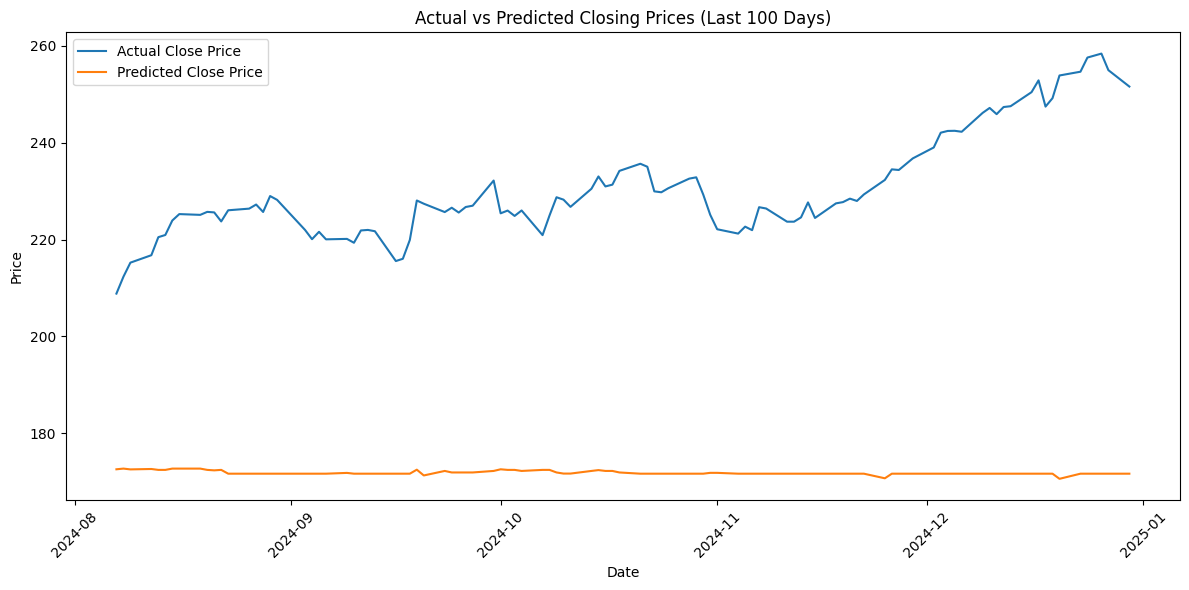

In [28]:
import matplotlib.pyplot as plt

# Plot actual vs predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Close_AAPL'], label='Actual Close Price')
plt.plot(results_df.index, results_df['Predicted_Close_Price'], label='Predicted Close Price')
plt.title('Actual vs Predicted Closing Prices (Last 100 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Based on model performance, discuss possible trading strategies.**


Based on the evaluation metrics, both the regression and classification models show limited predictive power. The regression model has a low R-squared value, suggesting it doesn't explain much of the price variance. The classification model's performance is close to random guessing, meaning it's not reliable for predicting price trends.

Given these results, it would be risky to develop trading strategies based solely on these models. It's crucial to improve the models' performance first. We could explore:



*   **Feature Engineering:** Creating more relevant features that capture market dynamics better.
*   **Trying different models:** Experimenting with other regression and classification algorithms that might be better suited for time series data.
*   **Hyperparameter tuning:** Optimizing the parameters of the current models.